In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne


In [96]:
sampfreq = 1000
prestim = .1
times = np.arange(400, dtype=np.float64) / sampfreq - prestim

def data_fun(times, ntrials = 100, noiselevel = 1, jitterlevel = .5): #Ntrials + some noise
    """Generate random source time courses. Sine multiplied by exponent.
        ntrials = number of trials
        noiselevel: multiples of std of signal
        jitterlevel: shift of sine in radians (full cycle 2pi)""" #APADT TO GENERATE A MATRIX
    
    rawtrials = np.zeros((ntrials, len(times)))
    
    for i in range(ntrials):
        #sourcewave = np.sin(50.0 * times) * np.exp(-((times - np.random.normal(.1, jitterlevel)) ** 2) / 0.01)
        sourcewave = np.sin(50.0 * times - np.random.normal(0, jitterlevel)) * np.exp(-((times - .1) ** 2) / 0.01)
        noisewave = np.random.normal(0, np.std(sourcewave) * noiselevel, len(sourcewave))
        rawtrials[i,] = sourcewave + noisewave

    return rawtrials


In [107]:
test = data_fun(times, noiselevel = 3, jitterlevel= .5)

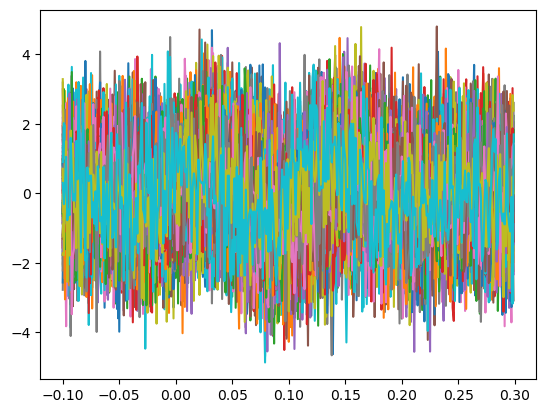

In [108]:
plt.plot(times.T, test.T)
plt.show()

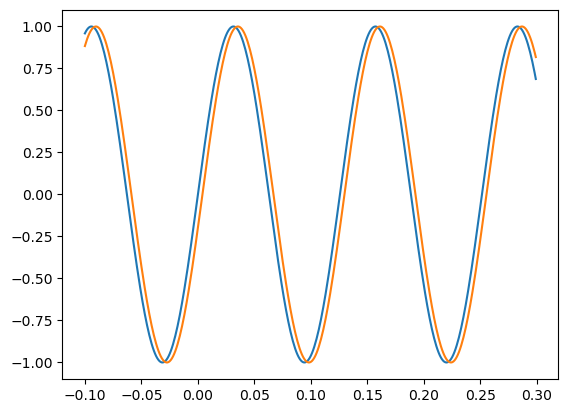

In [102]:
plt.plot(times, np.sin(50.0 * times))
plt.plot(times, np.sin(50.0 * times-.2))

In [104]:
?np.sin

Call signature:  np.sin(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sin'>
File:            ~/Library/CloudStorage/OneDrive-UniversitätSalzburg/Teaching/Master_VO_MethodsCogNeuro/methcogneurocode/.venv/lib/python3.11/site-packages/numpy/__init__.py
Docstring:      
sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, 